In [2]:
###Data Preprocessing:
# 1. Address missing or inconsistent data points.
# 2. Scale numerical features to a standard range.
# 3. Encode categorical data.
# 4. Calculate imbalances in data using the likelihood of injury. 
# your code
from sklearn.preprocessing import StandardScaler
import pandas as pd

df = pd.read_csv('injury_data.csv')


# 1. Display the number of missing values for each feature in the dataset
print("Features    # of missing values\n")
print(df.isnull().sum())
print('There are no missing values\n')
print("\n")

# 2. Assuming all columns except 'Likelihood_of_Injury' are numerical and need to be scaled
# 'Likelihood_of_Injury' is the variable you want to predict using machine learning, it's known as the target or label and typically isn't scaled.
features_to_scale = df.columns.drop('Likelihood_of_Injury')
scaler = StandardScaler()
# Scale the features
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

# 3. Print the basic information about the DataFrame to understand its structure
# including the number of entries, the type of each column, and memory usage
print(df.info())
print('There are no categorical values so no need to encode catagorical data\n')


# 4. Calculate imbalances/frequencies in data using the likelihood of injury
frequency = df['Likelihood_of_Injury'].value_counts()

# Print the frequency of 0 and 1
print(frequency)
print('Thus the data is balanced\n')


Features    # of missing values

Player_Age              0
Player_Weight           0
Player_Height           0
Previous_Injuries       0
Training_Intensity      0
Recovery_Time           0
Likelihood_of_Injury    0
dtype: int64
There are no missing values



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Player_Age            1000 non-null   float64
 1   Player_Weight         1000 non-null   float64
 2   Player_Height         1000 non-null   float64
 3   Previous_Injuries     1000 non-null   float64
 4   Training_Intensity    1000 non-null   float64
 5   Recovery_Time         1000 non-null   float64
 6   Likelihood_of_Injury  1000 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 54.8 KB
None
There are no categorical values so no need to encode catagorical data

Likelihood_of_Injury
0    500
1    500
Name: count

         Player_Age  Player_Weight  Player_Height  Previous_Injuries  \
count  1.000000e+03   1.000000e+03   1.000000e+03       1.000000e+03   
mean  -2.646772e-16   3.819167e-17  -1.037392e-15      -2.486900e-17   
std    1.000500e+00   1.000500e+00   1.000500e+00       1.000500e+00   
min   -1.565544e+00  -3.499553e+00  -3.486982e+00      -1.030464e+00   
25%   -9.534655e-01  -6.928144e-01  -6.792785e-01      -1.030464e+00   
50%   -3.534754e-02   2.287886e-02   2.868162e-02       9.704368e-01   
75%    8.827704e-01   6.582545e-01   6.886870e-01       9.704368e-01   
max    1.647869e+00   3.019492e+00   2.788121e+00       9.704368e-01   

       Training_Intensity  Recovery_Time  
count        1.000000e+03   1.000000e+03  
mean        -8.881784e-18  -1.065814e-16  
std          1.000500e+00   1.000500e+00  
min         -1.714813e+00  -1.450376e+00  
25%         -8.722396e-01  -8.622270e-01  
50%         -2.316612e-02   3.140718e-01  
75%          8.385730e-01   9.022212e-01  
max    

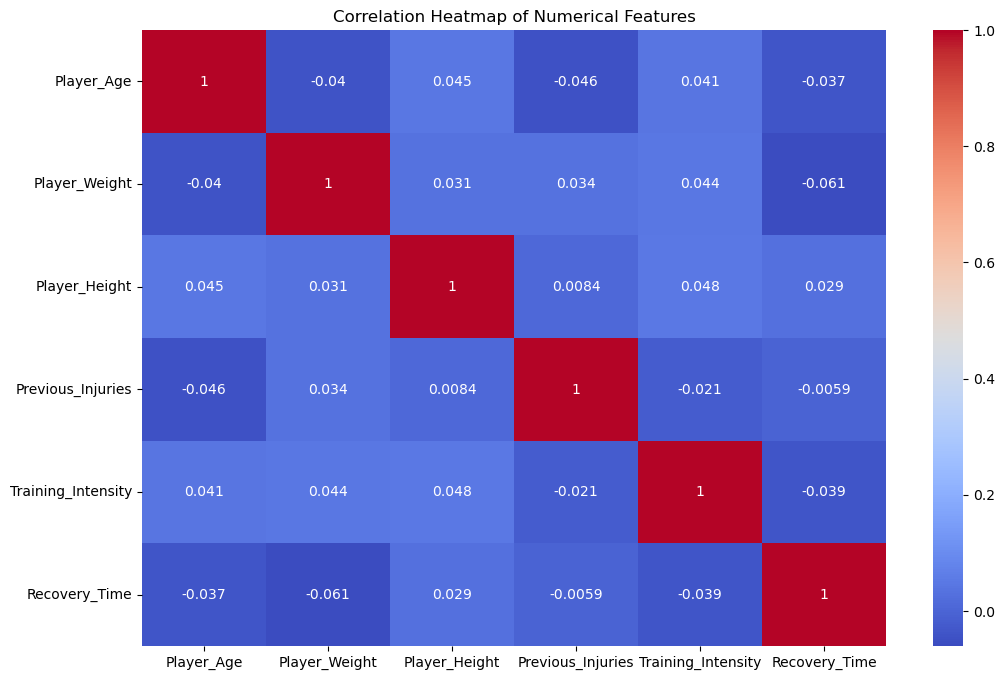

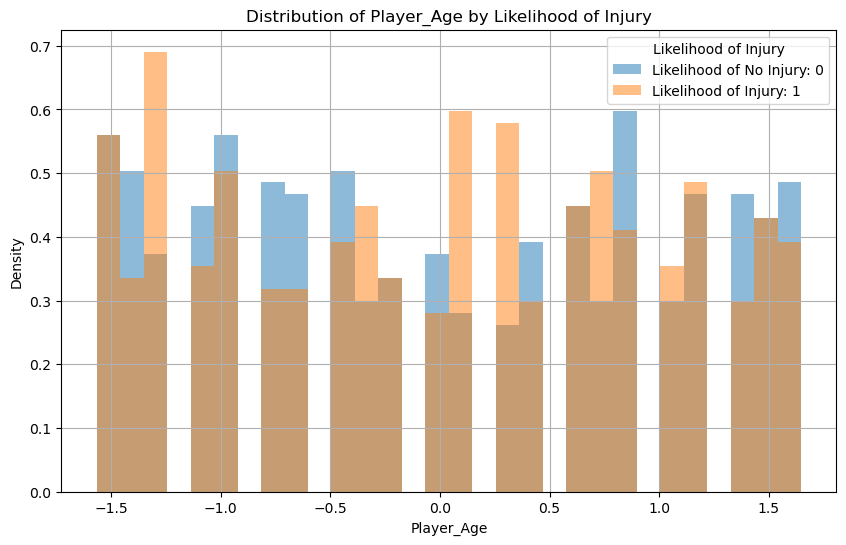

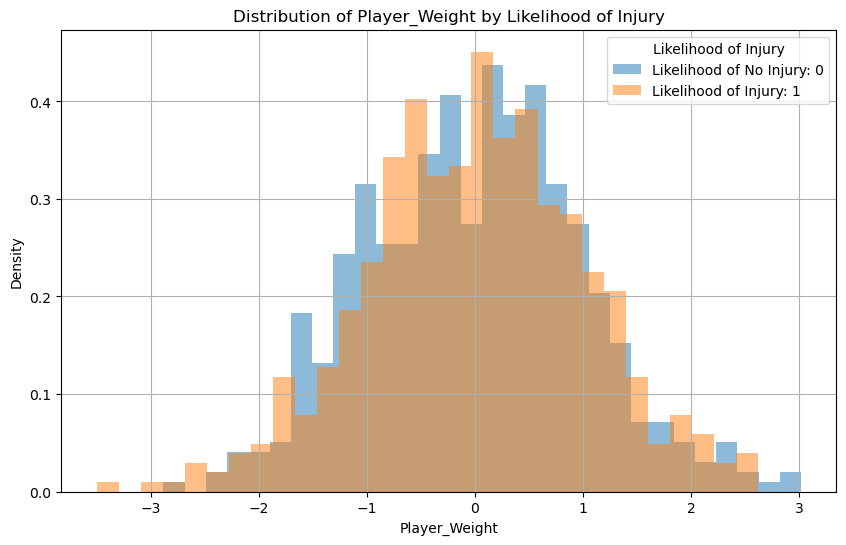

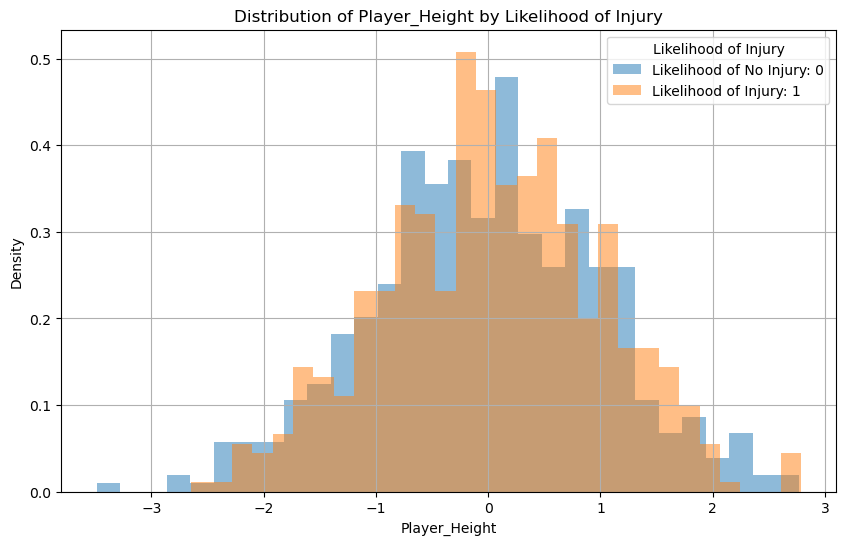

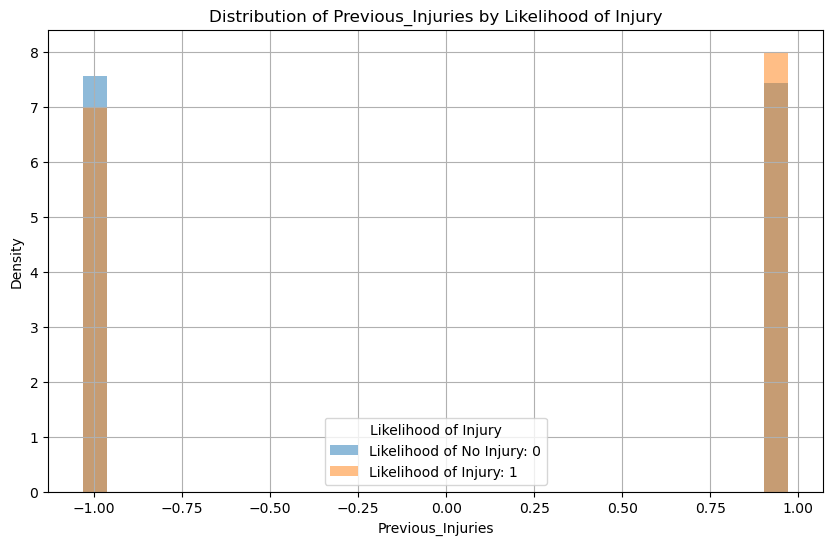

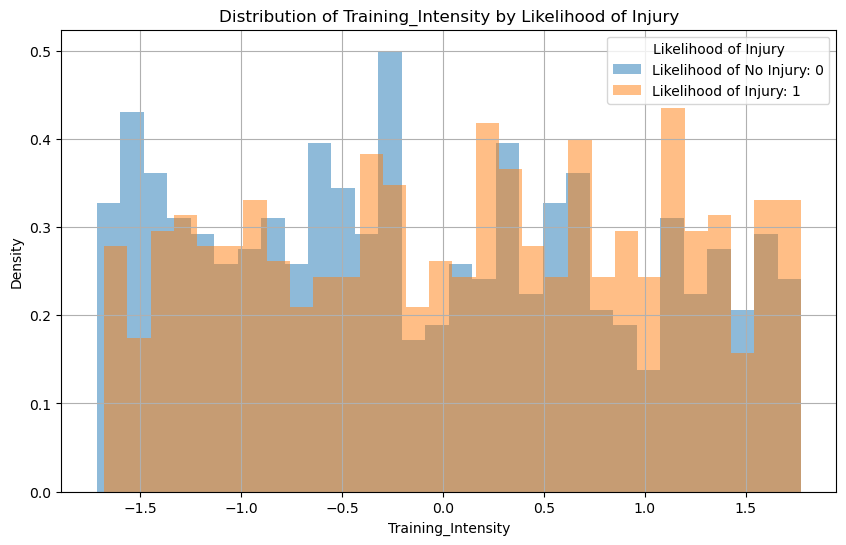

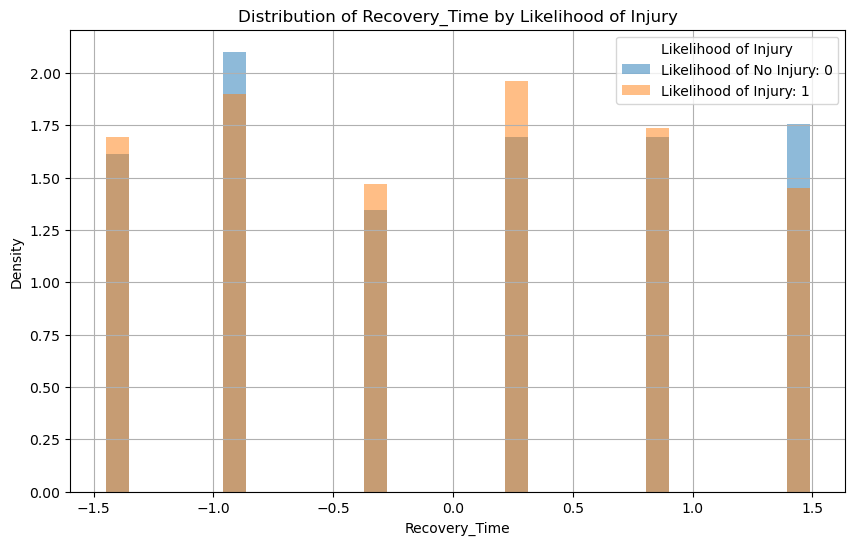

In [3]:
###Exploratory Data Analysis (EDA):
#1. Generate statistical summaries for numerical features.
#2. Perform correlation analysis.
#3. Create visualizations such as histograms and scatter plots to identify patterns and outliers.


import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Generate statistical summaries for numerical features

numerical_features = ['Player_Age', 'Player_Weight', 'Player_Height', 'Previous_Injuries', 'Training_Intensity', 'Recovery_Time']
print(df[numerical_features].describe())


# 2. Correlation heatmap for numerical features
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


#3.  Compare distributions of all numerical variables for different 'Likelihood_of_Injury' categories
numerical_features = ['Player_Age', 'Player_Weight', 'Player_Height', 'Previous_Injuries', 'Training_Intensity', 'Recovery_Time']
for feature in numerical_features:
    # Create two histograms for the different 'Likelihood_of_Injury' categories
    plt.figure(figsize=(10, 6))
    
    # Filter the dataframe by 'Likelihood_of_Injury' and plot each histogram
    df[df['Likelihood_of_Injury'] == 0][feature].hist(alpha=0.5, bins=30, label='Likelihood of No Injury: 0', density=True)
    df[df['Likelihood_of_Injury'] == 1][feature].hist(alpha=0.5, bins=30, label='Likelihood of Injury: 1', density=True)
    
    plt.title(f'Distribution of {feature} by Likelihood of Injury')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend(title='Likelihood of Injury')
    plt.show()




Linear Regression Model bias (intercept): -0.001323336191312837
Linear Regression Model coefficients: [-0.03223537 -0.09304579  0.03228919 -0.00242463 -0.04959785]
Linear Regression - Training set - MAE: 0.8738, MSE: 0.9948, RMSE: 0.9974
Linear Regression - Testing set - MAE: 0.8689, MSE: 0.9888, RMSE: 0.9944 

Ridge Regression with alpha = 0.1:
Intercept (bias): -0.001323336191312837
Coefficients: [-0.03223084 -0.09303417  0.03228421 -0.00242445 -0.0495921 ]
MAE: 0.8689, MSE: 0.9887, RMSE: 0.9944

Ridge Regression with alpha = 1:
Intercept (bias): -0.001323336191312837
Coefficients: [-0.03219016 -0.09292968  0.03223945 -0.00242281 -0.04954042]
MAE: 0.8689, MSE: 0.9887, RMSE: 0.9943

Ridge Regression with alpha = 10:
Intercept (bias): -0.0013233361913128367
Coefficients: [-0.03178889 -0.09189763  0.03179829 -0.00240656 -0.04902948]
MAE: 0.8690, MSE: 0.9884, RMSE: 0.9942

Logistic Regression - Accuracy: 0.5650, F1 Score: 0.5348, Recall: 0.4762, Precision: 0.6098
Confusion Matrix:
 [[63 

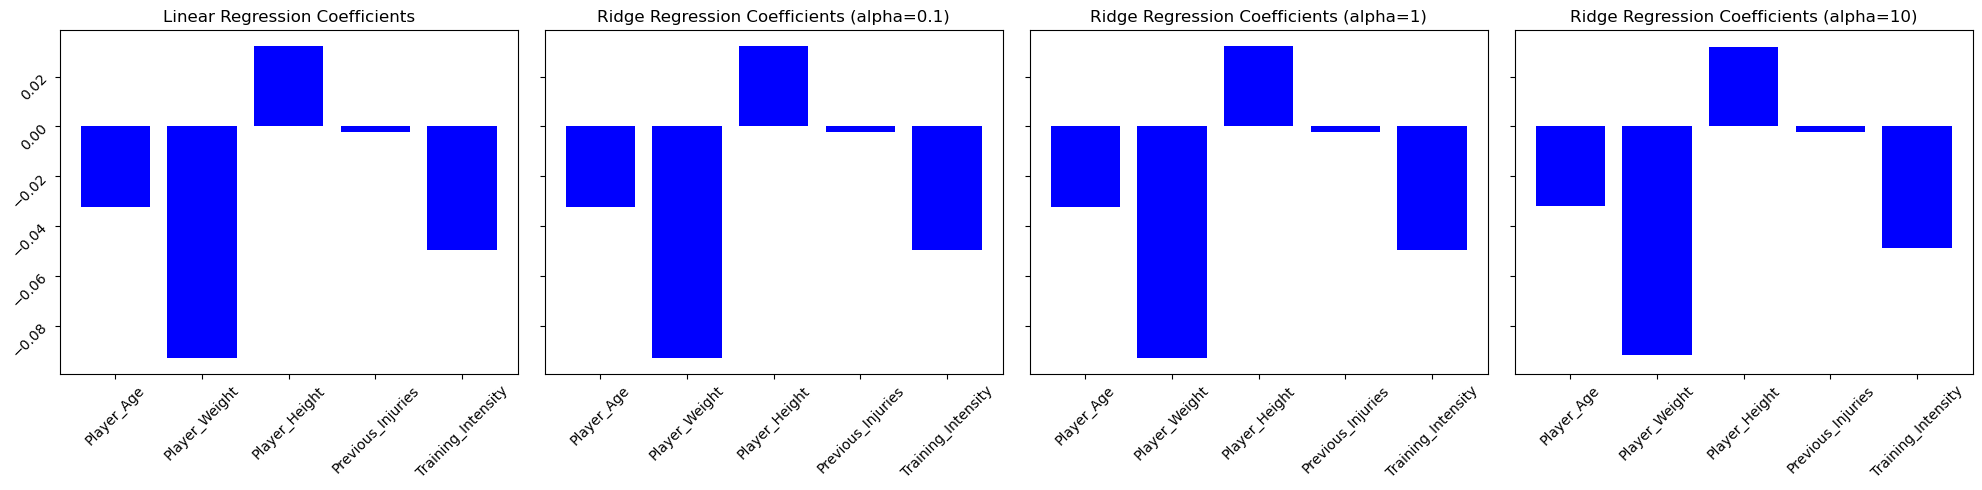

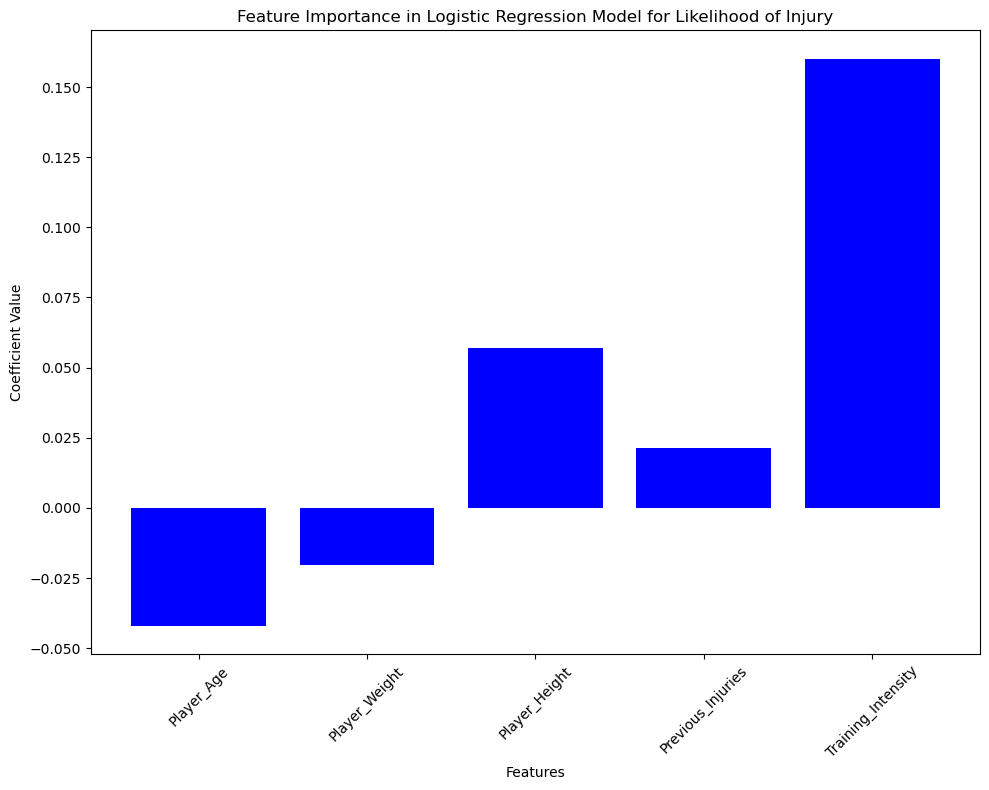

In [5]:
###Supervised Learning for Prediction + Model Evaluation:
#1. Implement regression Models to Predict 'Recovery time'
#2. Implement classification Models to Predict 'Likelihood_of_Injury'
#3. Model Evaluation



import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, f1_score, recall_score, precision_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt




# Separate the features for the regression task
features_regression = df.drop(columns=['Recovery_Time', 'Likelihood_of_Injury'])
target_regression = df['Recovery_Time']

# Split the data for regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(features_regression, target_regression, test_size=0.2, random_state=42)

# Initialize a StandardScaler to normalize features for regression
scaler_reg = StandardScaler()
# Fit the scaler to the training data and transform it
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_reg.transform(X_test_reg)

# 1. Linear Regression for predicting 'Recovery_Time'
lr = LinearRegression()
lr.fit(X_train_reg_scaled, y_train_reg)
print("Linear Regression Model bias (intercept):", lr.intercept_)
print("Linear Regression Model coefficients:", lr.coef_)

# 3. Linear Regression Evaluation
y_train_pred_reg = lr.predict(X_train_reg_scaled)
y_test_pred_reg = lr.predict(X_test_reg_scaled)
print('Linear Regression - Training set - MAE: {:.4f}, MSE: {:.4f}, RMSE: {:.4f}'.format(mean_absolute_error(y_train_reg, y_train_pred_reg), mean_squared_error(y_train_reg, y_train_pred_reg), np.sqrt(mean_squared_error(y_train_reg, y_train_pred_reg))))
print('Linear Regression - Testing set - MAE: {:.4f}, MSE: {:.4f}, RMSE: {:.4f} \n'.format(mean_absolute_error(y_test_reg, y_test_pred_reg), mean_squared_error(y_test_reg, y_test_pred_reg), np.sqrt(mean_squared_error(y_test_reg, y_test_pred_reg))))

# 1. and # 3. Ridge Regression for 'Recovery_Time' AND Evaluation
alphas = [0.1, 1, 10]
for alpha in alphas:
    ridge_regressor = Ridge(alpha=alpha)
    ridge_regressor.fit(X_train_reg_scaled, y_train_reg)
    y_test_pred_ridge = ridge_regressor.predict(X_test_reg_scaled)
    print(f'Ridge Regression with alpha = {alpha}:')
    print('Intercept (bias):', ridge_regressor.intercept_)
    print('Coefficients:', ridge_regressor.coef_)
    print(f'MAE: {mean_absolute_error(y_test_reg, y_test_pred_ridge):.4f}, MSE: {mean_squared_error(y_test_reg, y_test_pred_ridge):.4f}, RMSE: {np.sqrt(mean_squared_error(y_test_reg, y_test_pred_ridge)):.4f}\n')

    
    
# 2. and # 3. Logistic Regression for predicting 'Likelihood_of_Injury' AND Evaluation

# Separate the features for the classification task
features_classification = df.drop(columns=['Recovery_Time', 'Likelihood_of_Injury'])
target_classification = df['Likelihood_of_Injury']

# Split the data for classification
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(features_classification, target_classification, test_size=0.2, random_state=42)

# Initialize a StandardScaler to normalize features for classification
scaler_clf = StandardScaler()
# Fit the scaler to the training data and transform it
X_train_clf_scaled = scaler_clf.fit_transform(X_train_clf)
X_test_clf_scaled = scaler_clf.transform(X_test_clf)

#try regualrization to log regression, prevent over fitting, if not try another classifcation model other 
#than log regress to get beyyer Accuracy/F1 scores (50% is too low... that heads and tails)
logistic_model = LogisticRegression(solver='liblinear', random_state=42)
logistic_model.fit(X_train_clf_scaled, y_train_clf)
y_pred_clf = logistic_model.predict(X_test_clf_scaled)
#check for training accruary. if training accuray is very good but testing is bad than over fitting 
print(f"Logistic Regression - Accuracy: {accuracy_score(y_test_clf, y_pred_clf):.4f}, F1 Score: {f1_score(y_test_clf, y_pred_clf):.4f}, Recall: {recall_score(y_test_clf, y_pred_clf):.4f}, Precision: {precision_score(y_test_clf, y_pred_clf):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test_clf, y_pred_clf))
print("Classification Report:\n", classification_report(y_test_clf, y_pred_clf))
 
    
   
# Fit Ridge Regression models and store them in a list
ridge_regressors = []
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_reg_scaled, y_train_reg)
    ridge_regressors.append(ridge)
    
# Assuming you have already defined your models and trained them on your data:
# lr (your LinearRegression model) and ridge_regressors (list of your Ridge models with different alphas)

# Plotting all coefficients for both linear and ridge regression in a bar graph
fig, axes = plt.subplots(1, len(alphas) + 1, figsize=(20, 5), sharey=True)

# Linear Regression Coefficients
axes[0].bar(features_regression.columns, lr.coef_, color='blue')
axes[0].set_title('Linear Regression Coefficients')
axes[0].tick_params(labelrotation=45)

# Ridge Regression Coefficients for different alpha values
for i, alpha in enumerate(alphas):
    axes[i + 1].bar(features_regression.columns, ridge_regressors[i].coef_, color='blue')
    axes[i + 1].set_title(f'Ridge Regression Coefficients (alpha={alpha})')
    axes[i + 1].tick_params(labelrotation=45)

plt.tight_layout()
plt.show()
    
    
# Visualizing feature importance for Logistic Regression
plt.figure(figsize=(10, 8))
coefficients = logistic_model.coef_[0]
features = features_classification.columns
plt.bar(features, coefficients, color='blue')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=45)
plt.title('Feature Importance in Logistic Regression Model for Likelihood of Injury')
plt.tight_layout()
plt.show()
